In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import curve_fit

In [2]:
OC_PATH = "observed_catalogs/"
RC_PATH = "random_catalogs/"
FC_PATH = "full_catalogs/"
ML_PATH = "masterlists/"
VE_PATH = "volume_and_excentricity/"

This is how beta and nrand catalogs where created:

In [3]:
RawVoidCats = []

nrand_steps = 5
beta_steps  = 5

beta  = np.linspace(1.2, 2.0, beta_steps)
nrand = np.linspace(1.0, 1.8, nrand_steps)

CounterZero = 60


for i in range(CounterZero,80):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), delimiter=",")
    j = i % nrand_steps
    k = (i-CounterZero)//nrand_steps 
    
    RawVoidCats.append([i, beta[j], np.round(nrand[k], decimals=1), dataset])
    print(i, beta[j], nrand[k])

print("\n")
    
    
nrand_steps = 4

beta = 1.0
nrand = np.linspace(1.0, 1.6, nrand_steps)
CounterZero = 50

for i in range(CounterZero, 54):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), delimiter=",")
    k = (i - CounterZero) % nrand_steps
    RawVoidCats.append([i, beta, np.round(nrand[k], decimals=1), dataset])
    print(i, beta, np.round(nrand[k], decimals=1) )    
    
print("\n")
    
nrand_steps = 4
nrand = 1.8
beta  = np.linspace(1.0, 1.6, nrand_steps)
beta  = np.round(beta, decimals=1)
CounterZero = 30

for i in range(30, 34):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), delimiter=",")
    k = (i - CounterZero) % nrand_steps
    RawVoidCats.append([i, beta[k], nrand, dataset])
    print(i, beta[k], nrand)

print("\n")
    
i = 36 
dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), delimiter=",")
beta  = 1.0
nrand = 2.0
RawVoidCats.append([i, beta, nrand, dataset])
print(i, beta, nrand)

60 1.2 1.0
61 1.4 1.0
62 1.6 1.0
63 1.8 1.0
64 2.0 1.0
65 1.2 1.2
66 1.4 1.2
67 1.6 1.2
68 1.8 1.2
69 2.0 1.2
70 1.2 1.4
71 1.4 1.4
72 1.6 1.4
73 1.8 1.4
74 2.0 1.4
75 1.2 1.6
76 1.4 1.6
77 1.6 1.6
78 1.8 1.6
79 2.0 1.6


50 1.0 1.0
51 1.0 1.2
52 1.0 1.4
53 1.0 1.6


30 1.0 1.8
31 1.2 1.8
32 1.4 1.8
33 1.6 1.8


36 1.0 2.0


In [4]:
BoxLength = 720
Trim = 30

def TrimCatalog(ellip_cat):    
    halfboxtrim = BoxLength/2 - Trim

    index = np.where( 
            (abs(ellip_cat[:,1]) < halfboxtrim)   & 
            (abs(ellip_cat[:,2]) < halfboxtrim)   & 
            (abs(ellip_cat[:,3]) < halfboxtrim) )
    
    return ellip_cat[index]

def ellipticity(a,b,c):
    return (1/4.)*((a**2 - c**2) / (a**2 + b**2 + c**2))

def prolatness(a,b,c):
    return(1/4.)*( (b**2-c**2)+(b**2 - a**2)) / (a**2 + b**2 + c**2)


## To do the prolate/oblate scatter plot.
def density_estimation(m1, m2, xmin, xmax, ymin, ymax):
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = scipy.stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

Volume = (BoxLength - 2*Trim) ** 3
print(Volume)

287496000


In [5]:
BoxLength/2 - Trim

330.0

In [6]:
VoidCats = []

for i in range(len(RawVoidCats)):
    j     = RawVoidCats[i][0]
    beta  = RawVoidCats[i][1]
    nrand = RawVoidCats[i][2]
    print(j, beta, nrand, len(RawVoidCats[i][-1]))
    VoidCats.append([beta, nrand, TrimCatalog(RawVoidCats[i][-1])])



nan_array = np.zeros((1,1))
    
VoidCats.append([1.2, 2.0, nan_array])
VoidCats.append([1.4, 2.0, nan_array])
VoidCats.append([1.6, 2.0, nan_array])
VoidCats.append([1.8, 1.8, nan_array])
VoidCats.append([1.8, 2.0, nan_array])
VoidCats.append([2.0, 1.8, nan_array])
VoidCats.append([2.0, 2.0, nan_array])

60 1.2 1.0 10604
61 1.4 1.0 11676
62 1.6 1.0 11831
63 1.8 1.0 11404
64 2.0 1.0 11198
65 1.2 1.2 12730
66 1.4 1.2 13923
67 1.6 1.2 13839
68 1.8 1.2 13413
69 2.0 1.2 12964
70 1.2 1.4 14527
71 1.4 1.4 15542
72 1.6 1.4 15165
73 1.8 1.4 14507
74 2.0 1.4 13970
75 1.2 1.6 15643
76 1.4 1.6 16338
77 1.6 1.6 15897
78 1.8 1.6 15094
79 2.0 1.6 14540
50 1.0 1.0 7740
51 1.0 1.2 10029
52 1.0 1.4 11705
53 1.0 1.6 13243
30 1.0 1.8 14074
31 1.2 1.8 16300
32 1.4 1.8 16894
33 1.6 1.8 16318
36 1.0 2.0 14600


In [7]:
VoidCats[-1]

[2.0, 2.0, array([[0.]])]

In [8]:
VoidCats[11][2].shape

(11897, 18)

In [9]:
# Sort by nrand
VoidCats.sort(key = lambda x: x[1])
# Sort by beta
VoidCats.sort(key = lambda x: x[0])

In [10]:
ncats = len(VoidCats)

In [11]:
ncats

36

# Prolatness vs Ellipticity

In [12]:
VoidCats[1][-1].shape

(7614, 18)

In [13]:
def plot_prolatness_vs_ellipticity(fig, position, Dataset, xlabel=True, ylabel=True):
    ax = fig.add_subplot(position)

    unity = np.array([0,0.25])

    beta    = Dataset[0]
    nrand   = Dataset[1]
    VoidCat = Dataset[-1]

    xmin, xmax, ymin, ymax =  0, 0.25, -0.25, 0.25
    
    label = r"$\beta={{{:2.1f}}}$".format(beta)
    label += "\n"
    label += r"$n_{\mathrm{rnd} } = $" 
    label += "{:2.1f}".format(nrand)

    
    if ( VoidCat.shape != (1,1)):

        a = VoidCat[:,6]
        b = VoidCat[:,7]
        c = VoidCat[:,8]

        e = ellipticity(a,b,c)
        p = prolatness(a,b,c)

        print("beta={:2.1f}, nrand={:2.1f}. \tellipticity, prolatness".format(beta, nrand))
        print(np.percentile(e, [25, 50, 75]), np.percentile(p, [25, 50, 75]))
        


        ### Kernel Density begins here.
        X, Y, Z = density_estimation(e, p, xmin, xmax, ymin, ymax)
        ax.imshow(np.rot90(Z), 
                     cmap=plt.cm.terrain_r, 
                     extent=[xmin, xmax, ymin, ymax], 
                     aspect=1)   #aspect='auto'
        #plt.colorbar()
        # Add contour lines
        ax.contour(X, Y, Z, cmap="terrain")       
        ### Kernel Density ends here.

        #ax.text(0.04, 0.17, label)
        ax.scatter(e,p, s=0.1, label=label)

    else:
        ax.scatter(0,0, s=0.1, label=label)
           
    ax.plot(unity,  unity, linestyle="-.", color="k", lw=1)
    ax.plot(unity, -unity, linestyle="-.", color="k", lw=1)
    ax.axhline(0, color="k", lw=1)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    if(xlabel): 
        ax.set_xlabel("Ellipticity", fontsize=15)
        
    
    if(ylabel): 
        ax.set_ylabel("Prolatness", fontsize=15)
    else:
        ax.set_yticks([-0.2, -0.1, 0.0, 0.1, 0.2])
        ax.set_yticklabels([])
    
    ax.tick_params(axis="x",   top=True, direction="in")
    ax.tick_params(axis="y", right=True, direction="in")
    
    ax.set_xticks([0,0.1,0.2])
    ax.set_xticklabels(["0.0", "0.1", "0.2"])

In [14]:
def plot_prolatness_vs_ellipticity2(ax, Dataset):
    unity = np.array([0,0.25])

    beta    = Dataset[0]
    nrand   = Dataset[1]
    VoidCat = Dataset[-1]

    xmin, xmax, ymin, ymax =  0, 0.25, -0.25, 0.25
    
    if (VoidCat.shape != (1,1)):

        a = VoidCat[:,6]
        b = VoidCat[:,7]
        c = VoidCat[:,8]

        e = ellipticity(a,b,c)
        p = prolatness(a,b,c)

        e_p = np.percentile(e, [25, 50, 75])
        p_p = np.percentile(p, [25, 50, 75])
        
        e_m     = e_p[1]
        e_minus = e_p[0] - e_p[1]
        e_plus  = e_p[2] - e_p[1]
        p_m     = p_p[1]
        p_minus = p_p[0] - p_p[1]
        p_plus  = p_p[2] - p_p[1]
        
        print("beta={:2.1f}, nrand={:2.1f}. \tellipticity, prolatness".format(beta, nrand))
        print("{:1.4f} {:1.4f} {:1.4f}\t {:1.4f} {:1.4f} {:1.4f}".format(e_m, e_minus, e_plus, p_m, p_minus, p_plus))
        
        ### Kernel Density begins here.
        X, Y, Z = density_estimation(e, p, xmin, xmax, ymin, ymax)
        ax.imshow(np.rot90(Z), 
                     cmap=plt.cm.terrain_r, 
                     extent=[xmin, xmax, ymin, ymax], 
                     aspect='auto')   #aspect='auto','1'
        #plt.colorbar()
        # Add contour lines
        ax.contour(X, Y, Z, cmap="terrain")       
        ### Kernel Density ends here.


    """
    label = r"$\beta={{{:2.1f}}}$".format(beta)
    label += "\n"
    label += r"$n_{\mathrm{rnd} } = $" 
    label += "{:2.1f}".format(nrand)
    ax.text(0.04, 0.17, label)
    
    #ax.scatter(e,p, s=0.1)
    ax.scatter(0,0, s=0.1)
    """
    
    ax.plot(unity,  unity, linestyle="-.", color="k", lw=1)
    ax.plot(unity, -unity, linestyle="-.", color="k", lw=1)
    ax.axhline(0, color="k", lw=1)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    ax.tick_params(axis="x",   top=True, direction="in")
    ax.tick_params(axis="y", right=True, direction="in")
    
    ax.set_xticks([0,0.1,0.2])
    ax.set_xticklabels(["0.0", "0.1", "0.2"])
    ax.grid(True, which="both", axis="both")

    

beta=1.0, nrand=1.0. 	ellipticity, prolatness
0.1058 -0.0238 0.0257	 -0.0336 -0.0348 0.0333
beta=1.0, nrand=1.2. 	ellipticity, prolatness
0.1046 -0.0228 0.0257	 -0.0325 -0.0337 0.0332
beta=1.0, nrand=1.4. 	ellipticity, prolatness
0.1046 -0.0229 0.0243	 -0.0314 -0.0349 0.0316
beta=1.0, nrand=1.6. 	ellipticity, prolatness
0.1047 -0.0226 0.0252	 -0.0316 -0.0354 0.0318
beta=1.0, nrand=1.8. 	ellipticity, prolatness
0.1051 -0.0230 0.0255	 -0.0326 -0.0354 0.0322
beta=1.0, nrand=2.0. 	ellipticity, prolatness
0.1060 -0.0232 0.0247	 -0.0325 -0.0349 0.0328
beta=1.2, nrand=1.0. 	ellipticity, prolatness
0.1102 -0.0224 0.0249	 -0.0320 -0.0354 0.0340
beta=1.2, nrand=1.2. 	ellipticity, prolatness
0.1106 -0.0236 0.0255	 -0.0312 -0.0360 0.0331
beta=1.2, nrand=1.4. 	ellipticity, prolatness
0.1100 -0.0233 0.0261	 -0.0323 -0.0354 0.0334
beta=1.2, nrand=1.6. 	ellipticity, prolatness
0.1101 -0.0231 0.0251	 -0.0320 -0.0362 0.0334
beta=1.2, nrand=1.8. 	ellipticity, prolatness
0.1109 -0.0235 0.0266	 -0.0337 -0.

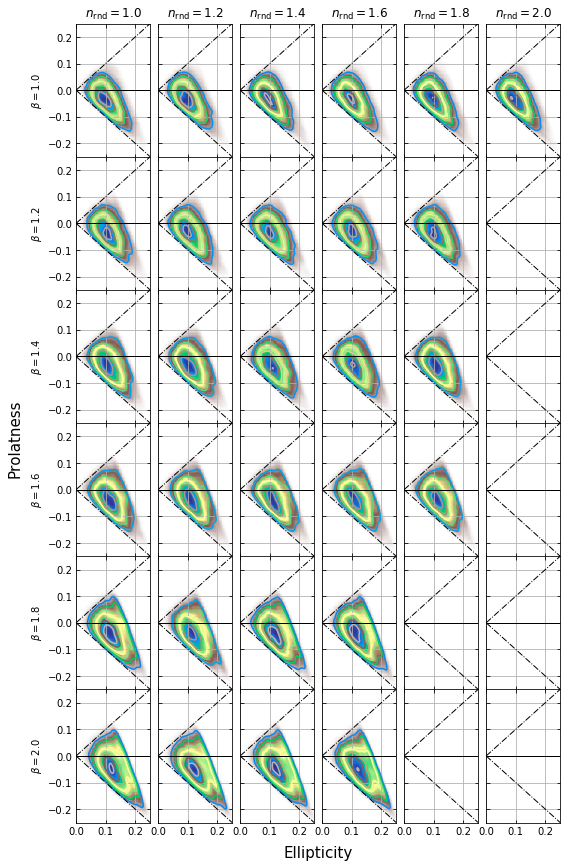

In [15]:
beta_steps  = 6
nrand_steps = 6
ylabelPE = "Prolatness"
xlabelPE = "Ellipticity"

fig, ax = plt.subplots(nrows=beta_steps, 
                       ncols=nrand_steps, 
                       sharex=True, 
                       sharey=True,
                       figsize=(8,12))
k = 0
for i in range(beta_steps):
    for j in range(nrand_steps):
        beta  = VoidCats[k][0]
        nrand = VoidCats[k][1] 
        plot_prolatness_vs_ellipticity2(ax[i][j], VoidCats[k])

        if(j==0):
            ax[i][j].set_ylabel(r"$\beta =$" + str(beta))
        if(i==0):
            ax[i][j].set_title(r"$n_{\mathrm{rnd} } =$" + str(nrand))     
        k +=1

fig.text(0.50, 0.02, xlabelPE, va='center', fontsize=15)        
fig.text(0.02, 0.50, ylabelPE, va='center', rotation='vertical', fontsize=15)        

plt.tight_layout(pad=0, rect=(0.06, 0.04, 0.98, 1.0))
plt.savefig("figures/prolatness_vs_ellipticity_beta_nrand_variations.pdf")

# Void Size Function

In [16]:
VSF_ymin = 3e-8
VSF_ymax = 2e-4
R_cut = 9

ylabelVSF = r"$ dn / dr \left[ \mathrm{h^3 / Mpc^3} \right] $"
xlabelVSF = r"$R_{\mathrm{eff}} \left[ \mathrm{Mpc / h} \right] $"

In [17]:
def plot_void_size_function(fig, Dataset):
    beta    = Dataset[0]
    nrand   = Dataset[1]
    VoidCat = Dataset[-1]
   
    label = r"$\beta={{{:2.1f}}}$".format(beta)
    label += "\n"
    label += r"$n_{\mathrm{rnd} } = $" 
    label += "{:2.1f}".format(nrand)
    
    
    
    NBINS = 50
    lnR_min = 0.1
    lnR_max = 2.5
    BINS  = np.linspace(lnR_min, lnR_max, NBINS)
    Bin_width = (BINS[1] - BINS[0])

    # Bins Edges array to plot steps.
    X = []
    for h in range(NBINS -1):
        X.extend([BINS[h], BINS[h+1]])
    X = np.array(X)
    
    # Bins centers
    Bins_c = (BINS[:-1] + BINS[1:])/2

    
    
    R = VoidCat[:,5]
    log10R_hist, bin_edges = np.histogram( np.log10(R), bins=BINS)
    log10R_hist = log10R_hist / (Volume * Bin_width)
    
    Y = [log10R_hist[0]]
    for h in range(NBINS - 2):
        Y.extend([log10R_hist[h], log10R_hist[h+1]])
    Y.append(log10R_hist[-1])
    
    
    plt.plot(10**X, Y, label=label)
    
    print("beta={:2.1f}, nrand={:2.1f}, Rmax={:05.2f}".format(beta, nrand, R.max()))
    
    #plt.fill_between(Bins_plt, 1e-12, R_hisplt, label=labels[i], alpha=0.5)

beta=1.0, nrand=1.0, Rmax=71.22
beta=1.0, nrand=1.2, Rmax=69.27
beta=1.0, nrand=1.4, Rmax=85.79
beta=1.0, nrand=1.6, Rmax=96.47


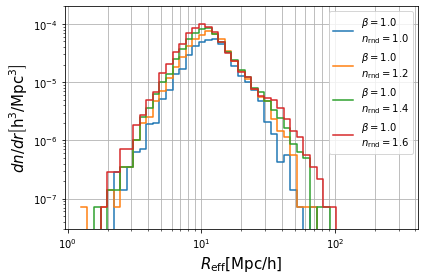

In [18]:
fig   = plt.figure(figsize=(6,4))

for i in range(4):
    plot_void_size_function(fig, VoidCats[i])

#plt.axvline(R_cut, c="k", linewidth=1, linestyle="-.")    
plt.legend(loc=0)    
#plt.xlim(lnR_min, lnR_max)
plt.ylim(VSF_ymin,VSF_ymax)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(ylabelVSF, fontsize=15)
plt.xlabel(xlabelVSF, fontsize=15)

plt.grid(True, which="both", axis="x")
plt.grid(True, which="major", axis="y")


plt.tight_layout()

#plt.savefig("figures/void_size_function.pdf")

# Fitting the Void Density Functions to Two Power Law Function.

\begin{equation}
f(r; n_1, n_2, R_0, N_0) = \frac{N_0}{ \left(\frac{r}{R_0} \right)^{n_1} 
     + \left( \frac{r}{R_0} \right)^{-n_2}}
\end{equation}

In [19]:
def two_power_law(x, n1, n2, R0, N0):
    return N0 * ( (x/R0)**n1 + (x/R0)**(-n2) )**(-1)

def two_power_law_LOG10(X, n1, n2, R0, N0):
    x = 10**X
    return np.log10(N0 * ( (x/R0)**n1 + (x/R0)**(-n2) )**(-1))

NBINS = 50
lnR_min = 0.1
lnR_max = 2.5
BINS  = np.linspace(lnR_min, lnR_max, NBINS)
Bin_width = (BINS[1] - BINS[0])

# Bins Edges array to plot steps.
X = []
for h in range(NBINS -1):
    X.extend([BINS[h], BINS[h+1]])
X = np.array(X)

# Bins centers
Bins_c = (BINS[:-1] + BINS[1:])/2



In [20]:
p0 = [4,4,11,10**-4]

In [21]:
histograms_and_fitting = []

for i in range(ncats):
    beta    = VoidCats[i][0]
    nrand   = VoidCats[i][1]
    Dataset = VoidCats[i][2]
    
    NBINS, lnR_min , lnR_max = 50, 0.1, 2.5
    BINS  = np.linspace(lnR_min, lnR_max, NBINS)
    Bin_width = (BINS[1] - BINS[0])
    # Bins centers
    X = (BINS[:-1] + BINS[1:])/2  
        
    if (Dataset.shape != (1,1)):
        R = Dataset[:,5]
        Rmax = R.max()

        log10R_hist, bin_edges = np.histogram( np.log10(R), bins=BINS)
        Y = log10R_hist / (Volume * Bin_width)

        # Avoid zeros in the curve_fit
        index = np.where(Y>0)
        X, Y = X[index], Y[index]


        p0 = [4,4,11,10**-4]
        p_fit, p_cov = curve_fit(two_power_law_LOG10, X, np.log10(Y), p0=p0)    
        histograms_and_fitting.append([beta, nrand, X, Y, p_fit, Rmax])
        
    else:
        p_fit = [np.nan, np.nan, np.nan, np.nan]
        histograms_and_fitting.append([beta, nrand, np.nan, np.nan, p_fit, np.nan])

/hpcfs/home/fl.gomez10/.conda/envs/pythesis/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


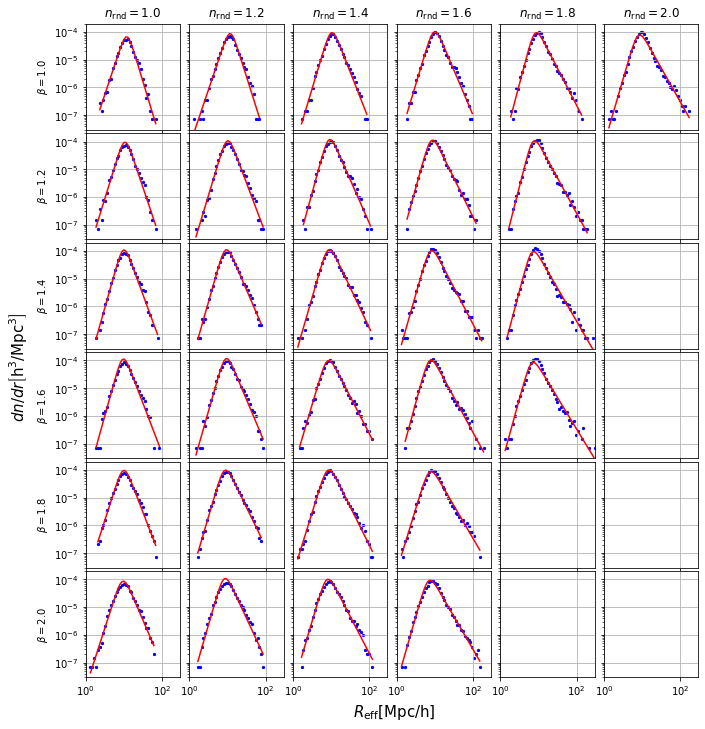

In [22]:
beta_steps  = 6
nrand_steps = 6
ylabel = r"$ dn / dr \left[ \mathrm{h^3 / Mpc^3} \right] $"
xlabel = r"$R_{\mathrm{eff}} \left[ \mathrm{Mpc / h} \right] $"


fig, ax = plt.subplots(nrows=beta_steps, 
                       ncols=nrand_steps, 
                       sharex=True, 
                       sharey=True,
                       figsize=(10,10))
"""
ax0 = fig.add_subplot(111)
ax0.spines['top'].set_color('none')
ax0.spines['bottom'].set_color('none')
ax0.spines['left'].set_color('none')
ax0.spines['right'].set_color('none')
ax0.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax0.set_ylabel(r"$ dn / dr \mathrm{\ [h^3 / Mpc^3]}$")
ax0.set_xlabel(r"$R$ (Mpc/h)")
"""

k = 0
for i in range(beta_steps):
    for j in range(nrand_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1] 
        x     = histograms_and_fitting[k][2]
        y     = histograms_and_fitting[k][3]
        p_fit = histograms_and_fitting[k][4]

        
        
        y_fit = 10**two_power_law_LOG10(x, p_fit[0], p_fit[1], p_fit[2], p_fit[3])
        ax[i][j].plot(10**x, y_fit, c='r')

        ax[i][j].scatter(10**x, y, s=5, c='b')
        
        ax[i][j].grid(True, which="both", axis="x")
        ax[i][j].grid(True, which="major", axis="y")
        ax[i][j].set_ylim(VSF_ymin,VSF_ymax)
        ax[i][j].set_xlim(1,300)
        ax[i][j].set_xscale("log")
        ax[i][j].set_yscale("log")        
        if(j==0):
            ax[i][j].set_ylabel(r"$\beta =$" + str(beta))
        if(i==0):
            ax[i][j].set_title(r"$n_{\mathrm{rnd} } =$" + str(nrand))
        k +=1

fig.text(0.50, 0.02, xlabel, va='center', fontsize=15)        
fig.text(0.02, 0.50, ylabel, va='center', rotation='vertical', fontsize=15)        

plt.tight_layout(pad=0, rect=(0.06, 0.04, 0.98, 1.0))
plt.savefig("figures/fitting_void_size_functions.pdf")

In [23]:
print("beta, nrand, [n1, n2, R0, N0]")

for i in range(ncats):
    beta  = histograms_and_fitting[i][0]
    nrand = histograms_and_fitting[i][1]
    p_fit = histograms_and_fitting[i][4]
    Rmax  = histograms_and_fitting[i][5]
    print(beta, nrand, p_fit, Rmax)

beta, nrand, [n1, n2, R0, N0]
1.0 1.0 [4.53853841e+00 4.12415613e+00 1.20548027e+01 1.35768079e-04] 71.22147039123669
1.0 1.2 [4.35450514e+00 4.06566408e+00 1.18564453e+01 1.76635932e-04] 69.27280056316808
1.0 1.4 [3.49465058e+00 4.56411977e+00 1.02042465e+01 1.89437504e-04] 85.78591075910158
1.0 1.6 [3.23628702e+00 4.56252561e+00 9.58182867e+00 2.03873147e-04] 96.46999694608245
1.0 1.8 [2.65772960e+00 5.20087626e+00 8.11452202e+00 1.81235982e-04] 135.7229055662968
1.0 2.0 [2.43611621e+00 4.70694556e+00 7.86224196e+00 1.49796234e-04] 174.09077159131792
1.2 1.0 [4.08206472e+00 4.44641818e+00 1.06942245e+01 1.91053510e-04] 72.75704362415561
1.2 1.2 [3.64871804e+00 4.55027346e+00 1.00217501e+01 2.13430882e-04] 89.16869596108229
1.2 1.4 [3.12530519e+00 4.99811670e+00 8.79254377e+00 2.31955287e-04] 106.99666724057634
1.2 1.6 [2.79504545e+00 4.92222310e+00 8.08861705e+00 2.17408747e-04] 121.18760342585395
1.2 1.8 [2.52592019e+00 5.37494097e+00 7.21063876e+00 2.00265572e-04] 184.7497100469200

# Plotting Fitting Functions.

In [24]:
Bins_c

array([0.1244898 , 0.17346939, 0.22244898, 0.27142857, 0.32040816,
       0.36938776, 0.41836735, 0.46734694, 0.51632653, 0.56530612,
       0.61428571, 0.66326531, 0.7122449 , 0.76122449, 0.81020408,
       0.85918367, 0.90816327, 0.95714286, 1.00612245, 1.05510204,
       1.10408163, 1.15306122, 1.20204082, 1.25102041, 1.3       ,
       1.34897959, 1.39795918, 1.44693878, 1.49591837, 1.54489796,
       1.59387755, 1.64285714, 1.69183673, 1.74081633, 1.78979592,
       1.83877551, 1.8877551 , 1.93673469, 1.98571429, 2.03469388,
       2.08367347, 2.13265306, 2.18163265, 2.23061224, 2.27959184,
       2.32857143, 2.37755102, 2.42653061, 2.4755102 ])

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0


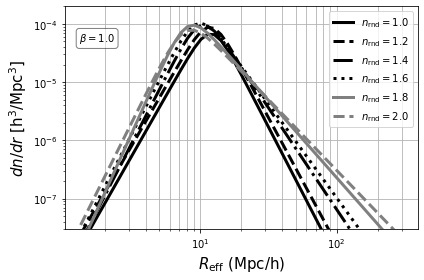

In [25]:
x = Bins_c

linestyles = ['solid', 'dashed', 'dashdot', 'dotted', 'solid', 'dashed', 'dashdot', 'dotted']
linecolour = ['k', 'k', 'k', 'k', 'gray', 'gray', 'gray', 'gray']

for j in range(1):
    fig = plt.figure()
    for i in range(6):
        beta  = histograms_and_fitting[i+j*4][0]
        nrand = histograms_and_fitting[i+j*4][1]
        p_fit = histograms_and_fitting[i+j*4][4]

        y = two_power_law_LOG10(x, p_fit[0], p_fit[1], p_fit[2], p_fit[3])

        label = r"$ n_{ \mathrm{rnd} } = $" + "{:02.1f}".format(nrand)

        plt.plot(10**x, 10**y, label=label, ls=linestyles[i], c=linecolour[i], lw=3)

        print(i+4*j, beta)
        text = r"$\beta =$" + "{:2.1f}".format(beta)


    props = dict(boxstyle='round', facecolor='white', alpha=0.5)    
    plt.text(1.3, 0.00005, text, fontsize=10, bbox=props)
    plt.legend(loc=1)
    plt.ylim(3e-8,2e-4)
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel(r"$ dn / dr \mathrm{\ [h^3 / Mpc^3]}$", fontsize=15)
    plt.xlabel(r"$R_{\mathrm{eff}}$ (Mpc/h)", fontsize=15)

    plt.grid(True, which="both", axis="x")
    plt.grid(True, which="major", axis="y")

    plt.tight_layout()

In [26]:
# Sort by nrand, then sort by beta.

histograms_and_fitting.sort(key = lambda x: x[0])
histograms_and_fitting.sort(key = lambda x: x[1])

In [27]:
nrand_steps = 4
beta_steps = 6

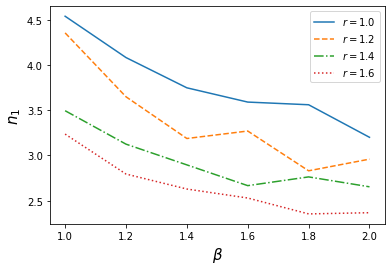

In [28]:

fig = plt.figure()
k=0

for i in range(nrand_steps):
    beta_list    = []
    Pfit_n1_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Pfit_n1_list.append(p_fit[0])
        beta_list.append(beta)
        k+=1
    
        
    if( i!= 5):
        plt.plot(beta_list, Pfit_n1_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        plt.scatter(beta_list, Pfit_n1_list, marker="+",
                 label=r"$r=$" + str(nrand))
    
plt.legend(loc=0)
plt.xlabel(r"$\beta$", fontsize=15)
plt.ylabel(r"$n_1$", fontsize=15)

plt.savefig("figures/var_beta_nrand_par_n1.pdf")

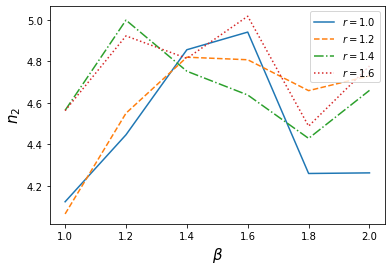

In [29]:
fig = plt.figure()
k=0

for i in range(nrand_steps):
    beta_list    = []
    Pfit_n2_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Pfit_n2_list.append(p_fit[1])
        beta_list.append(beta)
        k+=1
        
        
    if( i != 5):
        plt.plot(beta_list, Pfit_n2_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        plt.scatter(beta_list, Pfit_n2_list, marker="+",
                 label=r"$r=$" + str(nrand))

plt.legend(loc=1)
plt.xlabel(r"$\beta$", fontsize=15)
plt.ylabel(r"$n_2$", fontsize=15)
plt.savefig("figures/var_beta_nrand_par_n2.pdf")

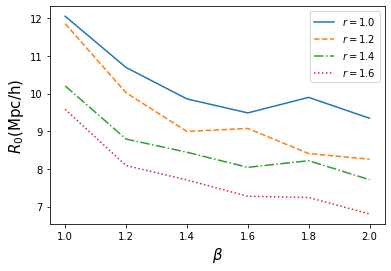

In [30]:
fig = plt.figure()
k=0

for i in range(nrand_steps):
    beta_list    = []
    Pfit_R0_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Pfit_R0_list.append(p_fit[2])
        beta_list.append(beta)
        k+=1

    if( i!= 5):
        plt.plot(beta_list, Pfit_R0_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        plt.scatter(beta_list, Pfit_R0_list, marker="+",
                 label=r"$r=$" + str(nrand))

plt.legend(loc=0)
plt.xlabel(r"$\beta$", fontsize=15)
plt.ylabel(r"$R_0$" + "(Mpc/h)", fontsize=15)
plt.savefig("figures/var_beta_nrand_par_R0.pdf")

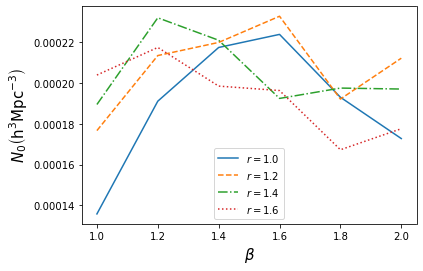

In [31]:
fig = plt.figure()
k=0

for i in range(nrand_steps):
    beta_list    = []
    Pfit_N0_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Pfit_N0_list.append(p_fit[3])
        beta_list.append(beta)
        k+=1
        
            
    if( i!= 5):
        plt.plot(beta_list, Pfit_N0_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        plt.scatter(beta_list, Pfit_N0_list, marker="+",
                 label=r"$r=$" + str(nrand))

plt.legend(loc=0)
plt.xlabel(r"$\beta$", fontsize=15)
plt.ylabel(r"$N_0 \left( \mathrm{h}^{3}\mathrm{Mpc}^{-3}\right)$" , fontsize=15)
plt.yscale("linear")
plt.savefig("figures/var_beta_nrand_par_N0.pdf")

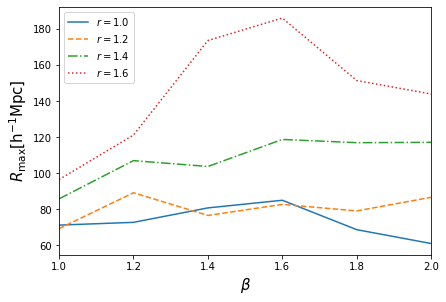

In [38]:
fig = plt.figure()
k=0

for i in range(nrand_steps):
    beta_list    = []
    Rmax_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Rmax_list.append(Rmax)
        beta_list.append(beta)
        k+=1
            
    if( i!= 5):
        plt.plot(beta_list, Rmax_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        plt.scatter(beta_list, Rmax_list, marker="+",
                 label=r"$r=$" + str(nrand))

plt.legend(loc=2)
plt.xlim(1,2)
plt.xlabel(r"$\beta$", fontsize=15)
plt.ylabel(r"$R_{\mathrm{max}}$" + r"[${\rm h^{-1}Mpc}$]", fontsize=15)

plt.yscale("linear")
plt.tight_layout(pad=0, rect=(0.00, 0.00, 1.0, 1.0))
plt.savefig("figures/var_beta_nrand_Rmax.pdf")

# Fraction of Volume in Voids vs Box Volume 

In [34]:
# Sort by beta, then by nrand.
VoidCats.sort(key = lambda x: x[0])
VoidCats.sort(key = lambda x: x[1])


1.0 1.0 0.275 0.049
1.2 1.0 0.347 0.087
1.4 1.0 0.394 0.107
1.6 1.0 0.413 0.127
1.8 1.0 0.425 0.145
2.0 1.0 0.42 0.147
1.0 1.2 0.378 0.107
1.2 1.2 0.476 0.187
1.4 1.2 0.533 0.229
1.6 1.2 0.563 0.255
1.8 1.2 0.581 0.293
2.0 1.2 0.573 0.285
1.0 1.4 0.486 0.196
1.2 1.4 0.633 0.33
1.4 1.4 0.704 0.397
1.6 1.4 0.784 0.492
1.8 1.4 0.79 0.508
2.0 1.4 0.768 0.488
1.0 1.6 0.62 0.326
1.2 1.6 0.791 0.491
1.4 1.6 1.027 0.753
1.6 1.6 1.03 0.766
1.8 1.6 1.033 0.777
2.0 1.6 1.053 0.804
1.0 1.8 0.842 0.559
1.2 1.8 1.132 0.854
1.4 1.8 1.447 1.196
1.6 1.8 1.582 1.34
1.0 2.0 1.133 0.87


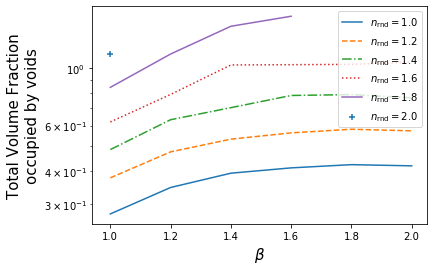

In [35]:
beta_steps  = 6
nrand_steps = 6

R_cut = 30 # Mpc/h

k = 0
for i in range(nrand_steps):
    beta_list = []
    vol_frac  = []
    vol_trim_frac = []
    
    for j in range(beta_steps):
        beta    = VoidCats[k][0]
        nrand   = VoidCats[k][1] 
        Dataset = VoidCats[k][2]
        k+=1
        
        
        if (Dataset.shape != (1,1)):
            R = Dataset[:,5]
            V = (4.0/3.0) * np.pi * R**3
            
            index = np.where(R> R_cut)
            Vtrim = (4.0/3.0) * np.pi *R[index]**3

            Vt = np.sum(V)     
            Vttrim = np.sum(Vtrim)

            
            beta_list.append(beta)
            vol_frac.append(Vt/ Volume)
            vol_trim_frac.append(Vttrim/ Volume)
            
            print( beta, nrand, 
                  np.round(Vt/Volume, decimals=3),
                  np.round(Vttrim/Volume, decimals=3))
    if( i!= 5):
        plt.plot(beta_list, vol_frac, ls=linestyles[i],
                 label=r"$n_\mathrm{rnd}=$" + str(nrand))
    else:
        plt.scatter(beta_list, vol_frac, marker="+",
                 label=r"$n_\mathrm{rnd}=$" + str(nrand))

#plt.ylabel("Total Volume Fraction\noccupied by voids", fontsize=15)        
plt.xlabel(r"$\beta$", fontsize=15)
plt.yscale("log")
plt.legend(loc=0)

1.0 1.0 0.275 0.049
1.2 1.0 0.347 0.087
1.4 1.0 0.394 0.107
1.6 1.0 0.413 0.127
1.8 1.0 0.425 0.145
2.0 1.0 0.42 0.147
1.0 1.2 0.378 0.107
1.2 1.2 0.476 0.187
1.4 1.2 0.533 0.229
1.6 1.2 0.563 0.255
1.8 1.2 0.581 0.293
2.0 1.2 0.573 0.285
1.0 1.4 0.486 0.196
1.2 1.4 0.633 0.33
1.4 1.4 0.704 0.397
1.6 1.4 0.784 0.492
1.8 1.4 0.79 0.508
2.0 1.4 0.768 0.488
1.0 1.6 0.62 0.326
1.2 1.6 0.791 0.491
1.4 1.6 1.027 0.753
1.6 1.6 1.03 0.766
1.8 1.6 1.033 0.777
2.0 1.6 1.053 0.804
1.0 1.8 0.842 0.559
1.2 1.8 1.132 0.854
1.4 1.8 1.447 1.196
1.6 1.8 1.582 1.34
1.0 2.0 1.133 0.87


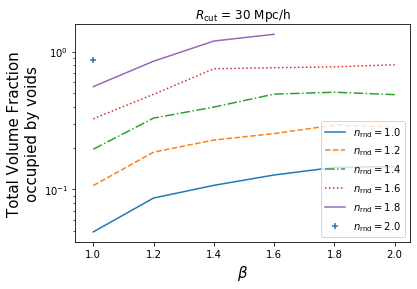

In [36]:
beta_steps  = 6
nrand_steps = 6

R_cut = 30 # Mpc/h

k = 0
for i in range(nrand_steps):
    beta_list = []
    vol_frac  = []
    vol_trim_frac = []
    
    for j in range(beta_steps):
        beta    = VoidCats[k][0]
        nrand   = VoidCats[k][1] 
        Dataset = VoidCats[k][2]
        k+=1
        
        
        if (Dataset.shape != (1,1)):
            R = Dataset[:,5]
            V = (4.0/3.0) * np.pi * R**3
            
            index = np.where(R> R_cut)
            Vtrim = (4.0/3.0) * np.pi *R[index]**3

            Vt = np.sum(V)     
            Vttrim = np.sum(Vtrim)

            
            beta_list.append(beta)
            vol_frac.append(Vt/ Volume)
            vol_trim_frac.append(Vttrim/ Volume)
            
            print( beta, nrand, 
                  np.round(Vt/Volume, decimals=3),
                  np.round(Vttrim/Volume, decimals=3))
    if( i!= 5):
        plt.plot(beta_list, vol_trim_frac, ls=linestyles[i],
                 label=r"$n_\mathrm{rnd}=$" + str(nrand))
    else:
        plt.scatter(beta_list, vol_trim_frac, marker="+",
                 label=r"$n_\mathrm{rnd}=$" + str(nrand))

plt.title(r"$R_\mathrm{cut}$ = 30 Mpc/h")
plt.ylabel("Total Volume Fraction\noccupied by voids", fontsize=15)        
plt.xlabel(r"$\beta$", fontsize=15)
plt.yscale("log")
plt.legend(loc=0)

# Merge the 4 parameter graphs in a single one.

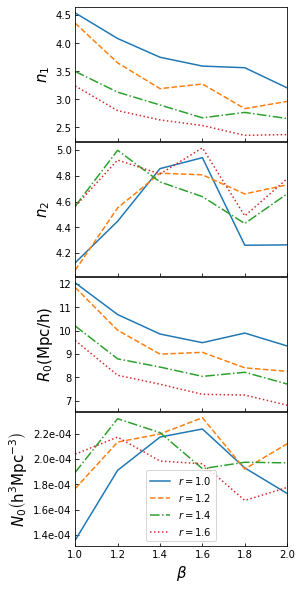

In [61]:
ncols = 1
nrows = 4

fig, ax = plt.subplots(ncols=ncols, 
                       nrows=nrows, 
                       sharex=True,
                       figsize=(4,8))
k=0

for i in range(nrand_steps):
    beta_list    = []
    Pfit_n1_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Pfit_n1_list.append(p_fit[0])
        beta_list.append(beta)
        k+=1
        
    if( i!= 5):
        ax[0].plot(beta_list, Pfit_n1_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        ax[0].scatter(beta_list, Pfit_n1_list, marker="+",
                 label=r"$r=$" + str(nrand))
    
#ax[0].legend(loc=0)
ax[0].set_ylabel(r"$n_1$", fontsize=15)

k=0
for i in range(nrand_steps):
    beta_list    = []
    Pfit_n2_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Pfit_n2_list.append(p_fit[1])
        beta_list.append(beta)
        k+=1
        
        
    if( i != 5):
        ax[1].plot(beta_list, Pfit_n2_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        ax[1].scatter(beta_list, Pfit_n2_list, marker="+",
                 label=r"$r=$" + str(nrand))

#ax[1].legend(loc=1)
#plt.xlabel(r"$\beta$", fontsize=15)
ax[1].set_ylabel(r"$n_2$", fontsize=15)


k=0
for i in range(nrand_steps):
    beta_list    = []
    Pfit_R0_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Pfit_R0_list.append(p_fit[2])
        beta_list.append(beta)
        k+=1

    if( i!= 5):
        ax[2].plot(beta_list, Pfit_R0_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        ax[2].scatter(beta_list, Pfit_R0_list, marker="+",
                 label=r"$r=$" + str(nrand))

#ax[2].legend(loc=0)
ax[2].set_ylabel(r"$R_0$" + "(Mpc/h)", fontsize=15)


k=0
for i in range(nrand_steps):
    beta_list    = []
    Pfit_N0_list = []

    for j in range(beta_steps):
        beta  = histograms_and_fitting[k][0]
        nrand = histograms_and_fitting[k][1]
        p_fit = histograms_and_fitting[k][4]
        Rmax  = histograms_and_fitting[k][5]

        Pfit_N0_list.append(p_fit[3])
        beta_list.append(beta)
        k+=1
        
            
    if( i!= 5):
        ax[3].plot(beta_list, Pfit_N0_list, ls=linestyles[i],
                 label=r"$r=$" + str(nrand))
    else:
        ax[3].scatter(beta_list, Pfit_N0_list, marker="+",
                 label=r"$r=$" + str(nrand))

ax[3].legend(loc=0)
ax[3].set_xlabel(r"$\beta$", fontsize=15)
ax[3].set_ylabel(r"$N_0 \left( \mathrm{h}^{3}\mathrm{Mpc}^{-3}\right)$" , fontsize=15)
ax[3].set_yscale("linear")

import matplotlib.ticker as mtick

ax[3].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))



for i in range(4):
    ax[i].tick_params(direction="in")
    ax[i].set_xlim(1,2)

plt.tight_layout(pad=0, rect=(0.00, 0.00, 1.0, 1.0))

plt.savefig("./figures/var_fit_parameters.pdf")

In [37]:
!head -n 2 volume_and_excentricity/60.vae

# Void_ID, X_c, Y_c, Z_c, N_particles, R=(abc)^(-1/3), a, b, c, vector_a, vector_b, vector_c 



In [38]:
!wc -l observed_catalogs/v300.dat

271452 observed_catalogs/v300.dat


Halo density in the 720 Mpc/h box 0.0007272698045267489

Particle density in the void
beta nrand, part_density, part_density/halo_density
1.0 1.0 0.000643 0.884
1.2 1.0 0.000623 0.857
1.4 1.0 0.000623 0.857
1.6 1.0 0.000603 0.828
1.8 1.0 0.000593 0.815
2.0 1.0 0.000575 0.79
1.0 1.2 0.000615 0.846
1.2 1.2 0.000597 0.82
1.4 1.2 0.000573 0.787
1.6 1.2 0.000572 0.786
1.8 1.2 0.000547 0.752
2.0 1.2 0.000542 0.746
1.0 1.4 0.000585 0.804
1.2 1.4 0.000558 0.768
1.4 1.4 0.000542 0.746
1.6 1.4 0.000518 0.713
1.8 1.4 0.000517 0.71
2.0 1.4 0.000509 0.699
1.0 1.6 0.000559 0.768
1.2 1.6 0.000531 0.73
1.4 1.6 0.000507 0.698
1.6 1.6 0.000492 0.676
1.8 1.6 0.000483 0.664
2.0 1.6 0.00048 0.66
1.0 1.8 0.000519 0.714
1.2 1.8 0.000502 0.69
1.4 1.8 0.000481 0.662
1.6 1.8 0.000481 0.661
1.0 2.0 0.000495 0.681


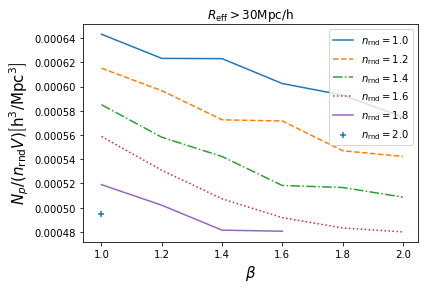

In [39]:
HalosInCatalog = 271452
HaloDensity = 271452.  / (720.**3)
print("Halo density in the 720 Mpc/h box" , HalosInCatalog * 720.0**(-3))

R_cut = 30 # Mpc/h

beta_steps  = 6
nrand_steps = 6

print("\nParticle density in the void")
print("beta nrand, part_density, part_density/halo_density")
k = 0
for i in range(nrand_steps):
    
    beta_list = []
    ratio_list = []
    
    for j in range(beta_steps):
        beta    = VoidCats[k][0]
        nrand   = VoidCats[k][1] 
        Dataset = VoidCats[k][2]
        k+=1
        
        
        if (Dataset.shape != (1,1)):
            R     = Dataset[:,5]                    
            index = np.where(R > R_cut)
            V     = (4.0/3.0) * np.pi * R[index]**3
            Np    = Dataset[index,4] 
            
            ratio = Np / (nrand * V)
            
            print(beta, nrand, np.round(ratio.mean(), decimals=6), 
                  np.round(ratio.mean()/HaloDensity, decimals=3) ) 

            beta_list.append(beta)
            ratio_list.append(ratio.mean())
    
    if( i!= 5):
        plt.plot(beta_list, ratio_list, ls=linestyles[i],
                 label=r"$n_\mathrm{rnd}=$" + str(nrand))
    else:
        plt.scatter(beta_list, ratio_list, marker="+",
                 label=r"$n_\mathrm{rnd}=$" + str(nrand))

#plt.axhline(y=HaloDensity, label="Halo Density")
        
ylabelUnits = r"$ \left[ \mathrm{h^3 / Mpc^3} \right]$"
plt.ylabel(r"$N_p / ( n_{ \mathrm{rnd} } V )$" + ylabelUnits, fontsize=15)
plt.xlabel(r"$\beta$", fontsize=15)
plt.title(r"$R_\mathrm{eff}>30$" + "Mpc/h")
plt.legend(loc=0)

In [40]:
Volume

287496000

In [41]:
660**3

287496000

In [42]:
720**3

373248000

### Checking  for $\beta=1.0$ and $n_{rnd}=1.0$

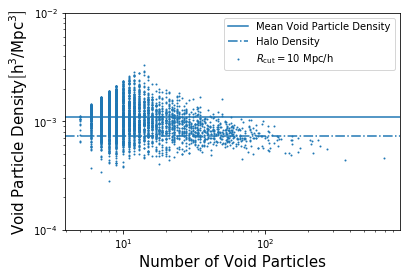

In [43]:
k = 0

beta    = VoidCats[k][0]
nrand   = VoidCats[k][1] 
Dataset = VoidCats[k][2]

R = Dataset[:,5]
Np = Dataset[:,4]
V = (4/3.) * np.pi * R**3
R_cut = 10

index = np.where(R> R_cut)
void_particle_density = Np[index] / (V[index] * nrand)

plt.scatter(Np[index], void_particle_density, s=1, label=r"$R_\mathrm{cut}=10$" + " Mpc/h")
plt.axhline(y = void_particle_density.mean(), label = "Mean Void Particle Density")
plt.axhline(y= 271452.0 * 720**(-3), ls="dashdot", label = "Halo Density")

plt.yscale("log")
plt.xscale("log")
plt.ylim(0.0001, 0.01)
plt.xlabel("Number of Void Particles", fontsize=15)
plt.ylabel("Void Particle Density" + ylabelUnits, fontsize=15)
plt.legend(loc=0)

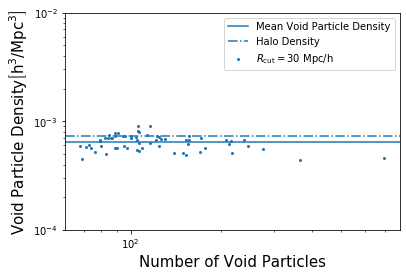

In [44]:
k = 0

beta    = VoidCats[k][0]
nrand   = VoidCats[k][1] 
Dataset = VoidCats[k][2]

R = Dataset[:,5]
Np = Dataset[:,4]
V = (4/3.) * np.pi * R**3
R_cut = 30

index = np.where(R> R_cut)

void_particle_density = Np[index] / (V[index] * nrand)

plt.scatter(Np[index], void_particle_density, s=4, label=r"$R_\mathrm{cut}=$" + str(R_cut) + " Mpc/h")
plt.axhline(y = void_particle_density.mean(), label = "Mean Void Particle Density")
plt.axhline(y= 271452.0 * 720**(-3), ls="dashdot", label = "Halo Density")

plt.yscale("log")
plt.xscale("log")
plt.ylim(0.0001, 0.01)
plt.xlabel("Number of Void Particles", fontsize=15)
plt.ylabel("Void Particle Density" + ylabelUnits, fontsize=15)
plt.legend(loc=0)

### Checking  for $\beta=1.8$ and $n_{rnd}=1.6$

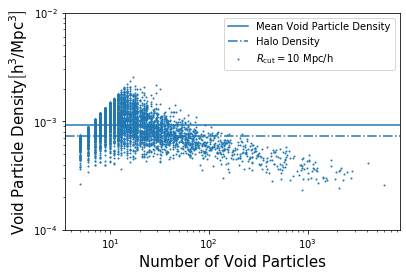

In [45]:
k = 22

beta    = VoidCats[k][0]
nrand   = VoidCats[k][1] 
Dataset = VoidCats[k][2]

R = Dataset[:,5]
Np = Dataset[:,4]
V = (4/3.) * np.pi * R**3
R_cut = 10

index = np.where(R> R_cut)
void_particle_density = Np[index] / (V[index] * nrand)

plt.scatter(Np[index], void_particle_density, s=1, label=r"$R_\mathrm{cut}=10$" + " Mpc/h")
plt.axhline(y = void_particle_density.mean(), label = "Mean Void Particle Density")
plt.axhline(y= 271452.0 * 720**(-3), ls="dashdot", label = "Halo Density")

plt.yscale("log")
plt.xscale("log")
plt.ylim(0.0001, 0.01)
plt.xlabel("Number of Void Particles", fontsize=15)
plt.ylabel("Void Particle Density" + ylabelUnits, fontsize=15)
plt.legend(loc=0)

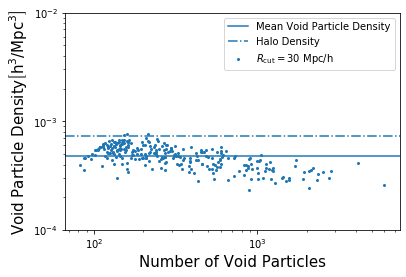

In [46]:
k = 22

beta    = VoidCats[k][0]
nrand   = VoidCats[k][1] 
Dataset = VoidCats[k][2]

R = Dataset[:,5]
Np = Dataset[:,4]
V = (4/3.) * np.pi * R**3
R_cut = 30

index = np.where(R> R_cut)

void_particle_density = Np[index] / (V[index] * nrand)

plt.scatter(Np[index], void_particle_density, s=4, label=r"$R_\mathrm{cut}=$" + str(R_cut) + " Mpc/h")
plt.axhline(y = void_particle_density.mean(), label = "Mean Void Particle Density")
plt.axhline(y= 271452.0 * 720**(-3), ls="dashdot", label = "Halo Density")

plt.yscale("log")
plt.xscale("log")
plt.ylim(0.0001, 0.01)
plt.xlabel("Number of Void Particles", fontsize=15)
plt.ylabel("Void Particle Density" + ylabelUnits, fontsize=15)
plt.legend(loc=0)

In [47]:
beta

1.8

In [48]:
nrand

1.6